# Exercise 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, expon, norm, pareto, t, chi2

np.random.seed(12345)

N = 100_000

## 3.1(a)

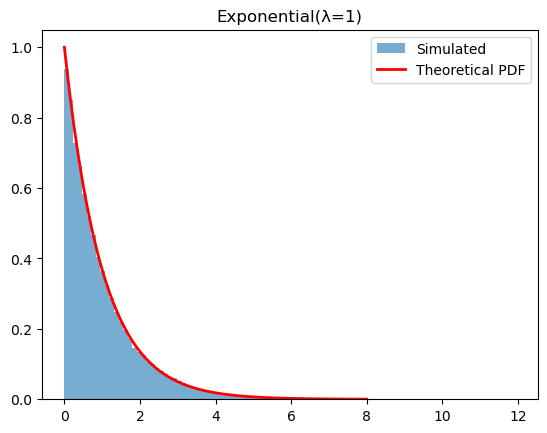

Expon KS p‐value: 0.1956588012568673


In [ ]:

exp_samples = np.random.exponential(scale=1.0, size=N)

x = np.linspace(0, 8, 200)
plt.figure()
plt.hist(exp_samples, bins=100, density=True, alpha=0.6, label='Simulated')
plt.plot(x, expon.pdf(x, scale=1.0), 'r-', lw=2, label='Theoretical PDF')
plt.title("Exponential(λ=1)")
plt.legend()
plt.show()
# KS‐test
print("Expon KS p‐value:", kstest(exp_samples, 'expon', args=(0,1))[1])

# 3.1(b)

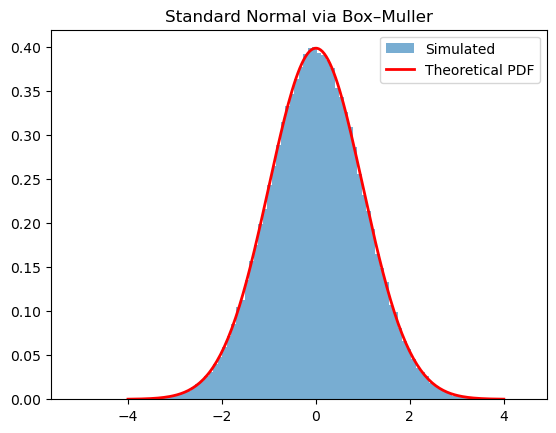

Normal KS p‐value: 0.08627847911864961


In [ ]:
U1, U2 = np.random.rand(2, N)
R = np.sqrt(-2 * np.log(U1))
Θ = 2 * np.pi * U2
Z1 = R * np.cos(Θ)
Z2 = R * np.sin(Θ)
norm_samples = np.concatenate([Z1, Z2])  

x = np.linspace(-4, 4, 200)
plt.figure()
plt.hist(norm_samples, bins=100, density=True, alpha=0.6, label='Simulated')
plt.plot(x, norm.pdf(x), 'r-', lw=2, label='Theoretical PDF')
plt.title("Standard Normal via Box–Muller")
plt.legend()
plt.show()
# KS‐test (on first N)
print("Normal KS p‐value:", kstest(Z1, 'norm')[1])

# 3.1(c)

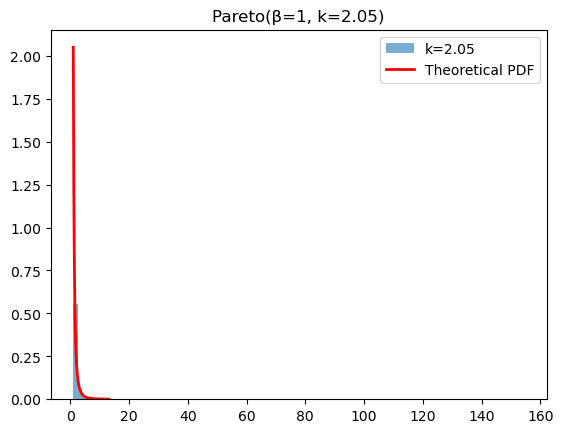

Pareto k=2.05 KS p‐value: 0.7664950654106945


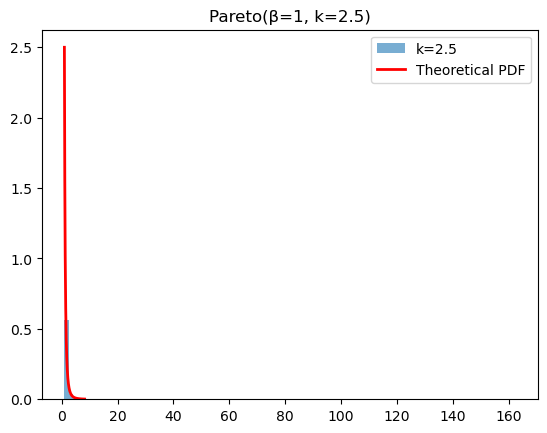

Pareto k=2.5 KS p‐value: 0.5677068856523437


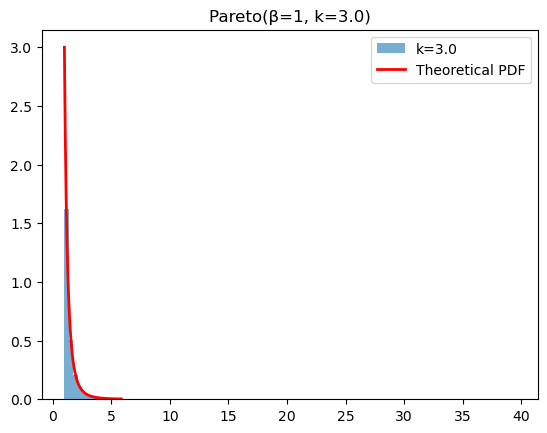

Pareto k=3.0 KS p‐value: 0.6372008152982156


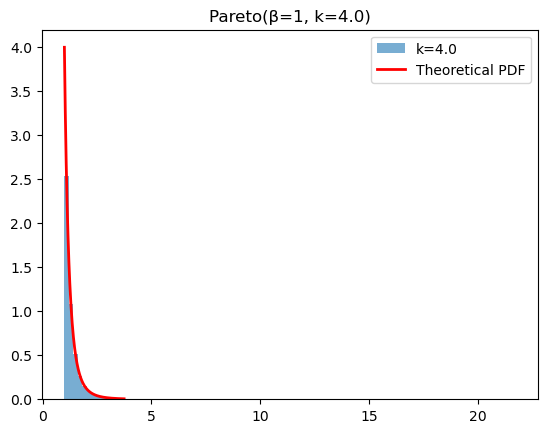

Pareto k=4.0 KS p‐value: 0.2041821506223508


In [ ]:
beta = 1.0
ks = [2.05, 2.5, 3.0, 4.0]
pareto_samples = {}
for k in ks:
    U = np.random.rand(N)
    X = beta * (1-U)**(-1.0/k)
    pareto_samples[k] = X

    # Plot
    x = np.linspace(1, np.percentile(X, 99.5), 200)
    plt.figure()
    plt.hist(X, bins=100, density=True, alpha=0.6, label=f'k={k}')
    plt.plot(x, pareto.pdf(x, b=k, scale=beta), 'r-', lw=2, label='Theoretical PDF')
    plt.title(f"Pareto(β=1, k={k})")
    plt.legend()
    plt.show()

    # KS‐test
    print(f"Pareto k={k} KS p‐value:",
          kstest(X, 'pareto', args=(k, 0, beta))[1])


## 3.2

In [ ]:
print("\nSample vs Analytic moments for Pareto:")
for k in ks:
    X = pareto_samples[k]
    samp_mean = X.mean()
    samp_var  = X.var(ddof=1)
    an_mean = beta * k / (k - 1)
    an_var  = (beta**2 * k) / ((k - 1)**2 * (k - 2)) if k > 2 else np.nan
    print(f" k={k}:  mean: sim={samp_mean:.3f}, ana={an_mean:.3f};"
          f"  var: sim={samp_var:.3f}, ana={an_var:.3f}")


Sample vs Analytic moments for Pareto:
 k=2.05:  mean: sim=1.939, ana=1.952;  var: sim=5.575, ana=37.188
 k=2.5:  mean: sim=1.665, ana=1.667;  var: sim=2.186, ana=2.222
 k=3.0:  mean: sim=1.504, ana=1.500;  var: sim=0.738, ana=0.750
 k=4.0:  mean: sim=1.334, ana=1.333;  var: sim=0.223, ana=0.222


## 3.3

In [ ]:
mu_true, sigma2_true = 0.0, 1.0
n = 10
reps = 100
mean_covers = 0
var_covers  = 0

for _ in range(reps):
    Y = np.random.randn(n)
    ybar = Y.mean()
    s2   = Y.var(ddof=1)
    tcrit = t.ppf(0.975, df=n-1)
    half_width = tcrit * np.sqrt(s2/n)
    if mu_true >= ybar - half_width and mu_true <= ybar + half_width:
        mean_covers += 1
    chi_lo = chi2.ppf(0.975, df=n-1)
    chi_hi = chi2.ppf(0.025, df=n-1)
    lo = (n-1)*s2/chi_lo
    hi = (n-1)*s2/chi_hi
    if sigma2_true >= lo and sigma2_true <= hi:
        var_covers += 1

print(f"\nCoverage over {reps} intervals:")
print(f" Mean 95% CI covered true μ in {mean_covers} cases.")
print(f" Var  95% CI covered true σ² in {var_covers} cases.")


Coverage over 100 intervals:
 Mean 95% CI covered true μ in 96 cases.
 Var  95% CI covered true σ² in 93 cases.


## 3.4

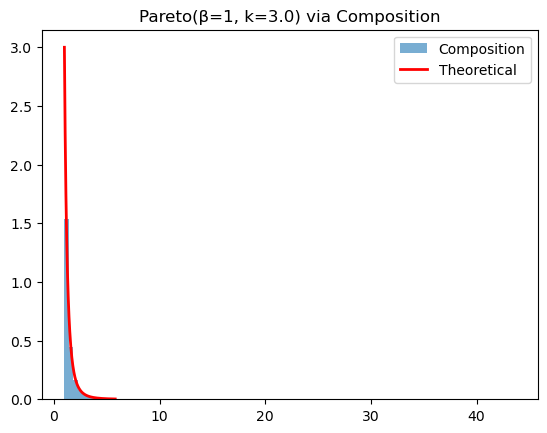

In [ ]:
k = 3.0
Y = np.random.exponential(scale=1.0, size=N)
X_comp = beta * np.exp(Y / k)
x = np.linspace(1, np.percentile(X_comp, 99.5), 200)
plt.figure()
plt.hist(X_comp, bins=100, density=True, alpha=0.6, label='Composition')
plt.plot(x, pareto.pdf(x, b=k, scale=beta), 'r-', lw=2, label='Theoretical')
plt.title(f"Pareto(β=1, k={k}) via Composition")
plt.legend()
plt.show()